# 🔥 Chapter 6 Notebook  
## Heat and Kinetic Theory (plus diffusion, radiation, and biological examples)

**You will learn**
- The difference between **temperature**, **heat**, and **molecular kinetic energy**
- How temperature relates to particle motion (kinetic theory)
- How heat moves by **conduction**, **convection**, and **radiation**
- Why **diffusion** is fast in cells but slow across large distances
- How **Fick’s laws** connect to **gas exchange** and **diffusion MRI**

### ✅ Learning objectives

By the end of this chapter, you should be able to:
- Distinguish heat, temperature, and kinetic energy at the molecular level  
- Apply the ideal gas law and relate temperature to molecular motion  
- Explain heat transfer by conduction, convection, and radiation  
- Describe diffusion using Fick’s laws and relate it to gas exchange in biology  
- Recognize how surfactants and diffusion MRI illustrate thermal and molecular principles

---

## Setup (run first)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
print("✅ Imports worked. You're ready to go!")

✅ Imports worked. You're ready to go!


---

## Part 1) Temperature scales: °C, K, and °F

**Temperature** is a number that tells you “how hot/cold” something is.  
**Kelvin (K)** is the SI temperature scale and starts at **absolute zero**.

### Your task
Run the next cell, then change the input temperature and re-run.

In [2]:
def C_to_K(T_C):
    return T_C + 273.15

def K_to_C(T_K):
    return T_K - 273.15

def C_to_F(T_C):
    return (9/5)*T_C + 32

def F_to_C(T_F):
    return (5/9)*(T_F - 32)

# Try changing this:
T_C = 37.0  # body temperature (°C)

print(f"{T_C:.2f} °C  =  {C_to_K(T_C):.2f} K")
print(f"{T_C:.2f} °C  =  {C_to_F(T_C):.2f} °F")

37.00 °C  =  310.15 K
37.00 °C  =  98.60 °F


### Quick check (conceptual)
If two objects have the **same temperature**, what happens if you put them in contact?

> They are already at **thermal equilibrium**, so there is **no net heat flow**.

---

## Part 2) Heat vs temperature (and “how much energy?”)

Temperature tells you “how hot.”  
**Heat** is **energy transferred** because of a temperature difference.

A common relationship:
$$
Q = m c \Delta T
$$
- $Q$: heat energy (J)  
- $m$: mass (kg)  
- $c$: specific heat (J/kg·°C)  
- $\Delta T$: temperature change (°C)

### Example: Heating water
Let’s estimate how much energy it takes to warm up water.

In [3]:
def heat_required(m_kg, c_J_per_kgC, delta_T_C):
    return m_kg * c_J_per_kgC * delta_T_C

c_water = 4184  # J/(kg·°C)

m = 0.25       # kg (about 250 mL of water)
delta_T = 10.0 # °C increase

Q = heat_required(m, c_water, delta_T)
print(f"Energy needed to heat {m*1000:.0f} mL of water by {delta_T:.1f} °C ≈ {Q:,.0f} J")

Energy needed to heat 250 mL of water by 10.0 °C ≈ 10,460 J


### Try it
1. Change the mass to **1.0 kg**  
2. Change ΔT to **1.0 °C**  

What number do you get? (It should be close to 4184 J.)

---

## Part 3) Kinetic theory: temperature as molecular motion

At the molecular level, particles are always moving.  
A key idea from kinetic theory is that **temperature is proportional to the average kinetic energy**.

In many intro models:
$$
\langle E_k \rangle = \frac{3}{2} k_B T
$$
- $k_B$: Boltzmann constant  
- $T$: temperature in Kelvin

In [4]:
k_B = 1.380649e-23  # J/K

def avg_kinetic_energy(T_K):
    return 1.5 * k_B * T_K

for T_K in [273.15, 293.15, 310.15]:
    print(f"T = {T_K:.2f} K  ->  <Ek> = {avg_kinetic_energy(T_K):.3e} J per molecule")

T = 273.15 K  ->  <Ek> = 5.657e-21 J per molecule
T = 293.15 K  ->  <Ek> = 6.071e-21 J per molecule
T = 310.15 K  ->  <Ek> = 6.423e-21 J per molecule


### Visualization: “speed distribution” (toy model)

Real gas speeds follow a Maxwell–Boltzmann distribution.  
We won’t derive it here — we’ll do a **visual intuition** version:

- Randomly sample velocity components $v_x, v_y, v_z$
- Compute speed $v = \sqrt{v_x^2 + v_y^2 + v_z^2}$
- Compare **low** vs **high** temperature

> You only need to interpret the plots: higher temperature → speeds shift higher.

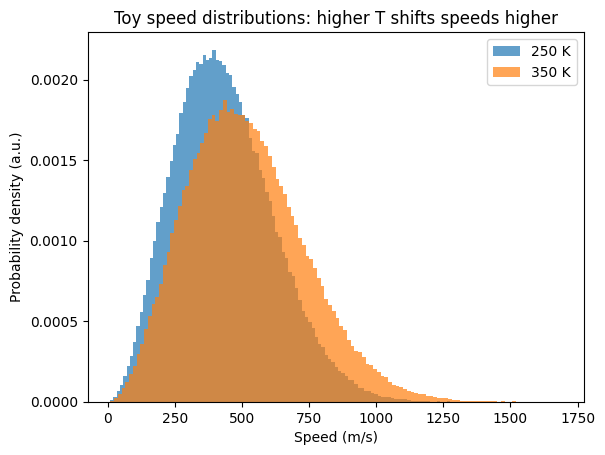

In [5]:
def sample_speeds(T_K, N=200_000, mass_kg=4.65e-26):
    # Toy model: component std dev ~ sqrt(kT/m)
    sigma = np.sqrt(k_B * T_K / mass_kg)
    vx = np.random.normal(0, sigma, size=N)
    vy = np.random.normal(0, sigma, size=N)
    vz = np.random.normal(0, sigma, size=N)
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    return v

np.random.seed(0)

T_low = 250   # K
T_high = 350  # K

v_low = sample_speeds(T_low)
v_high = sample_speeds(T_high)

plt.figure()
plt.hist(v_low, bins=120, density=True, alpha=0.7, label=f"{T_low} K")
plt.hist(v_high, bins=120, density=True, alpha=0.7, label=f"{T_high} K")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability density (a.u.)")
plt.title("Toy speed distributions: higher T shifts speeds higher")
plt.legend()
plt.show()

### Try it
- Change `T_low` and `T_high` (e.g., 280 K and 310 K) and re-run.
- Optional: change `mass_kg` to a smaller value (lighter gas). What happens?

---

## Part 4) Ideal gas law (linking pressure, temperature, volume)

A common form is:
$$
PV = nRT
$$

We’ll see how **pressure changes with temperature** if volume is fixed.

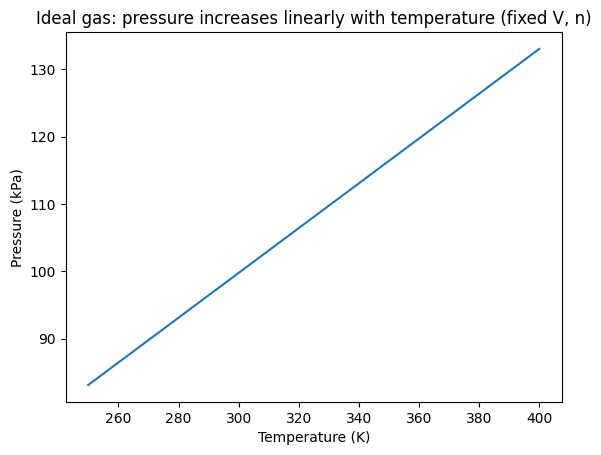

At 300 K, pressure ≈ 0.98 atm


In [6]:
R = 8.314462618  # J/(mol·K)

def pressure_ideal_gas(n_mol, T_K, V_m3):
    return n_mol * R * T_K / V_m3

n = 0.04   # mol
V = 1e-3   # m^3 (1 L)

T = np.linspace(250, 400, 200)
P = pressure_ideal_gas(n, T, V)  # Pa

plt.figure()
plt.plot(T, P/1000)  # kPa
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (kPa)")
plt.title("Ideal gas: pressure increases linearly with temperature (fixed V, n)")
plt.show()

print(f"At 300 K, pressure ≈ {pressure_ideal_gas(n, 300, V)/101325:.2f} atm")

---

## Part 5) Heat transfer: conduction, convection, radiation

- **Conduction**: direct transfer through a material  
- **Convection**: heat carried away by moving fluid (air/water/blood)  
- **Radiation**: EM emission (especially infrared for bodies)

### 5A) Convection: Newton’s Law of Cooling (coffee-cup model)

A simple model:
$$
\frac{dT}{dt} = -k (T - T_{env})
$$
Solution:
$$
T(t) = T_{env} + (T_0 - T_{env})e^{-kt}
$$

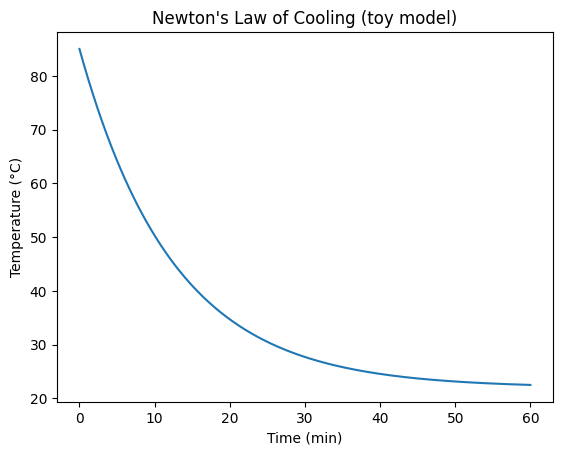

Tip: Increase k to represent wind / stirring / forced air flow.


In [7]:
def newtons_cooling(T0_C, Tenv_C, k_per_min, t_min):
    return Tenv_C + (T0_C - Tenv_C) * np.exp(-k_per_min * t_min)

T0 = 85.0     # °C
Tenv = 22.0   # °C
k = 0.08      # per minute (bigger = faster cooling)

t = np.linspace(0, 60, 300)
Tt = newtons_cooling(T0, Tenv, k, t)

plt.figure()
plt.plot(t, Tt)
plt.xlabel("Time (min)")
plt.ylabel("Temperature (°C)")
plt.title("Newton's Law of Cooling (toy model)")
plt.show()

print("Tip: Increase k to represent wind / stirring / forced air flow.")

### 5B) Radiation: Stefan–Boltzmann (net radiative power)

$$
P = e\sigma A (T^4 - T_{env}^4)
$$

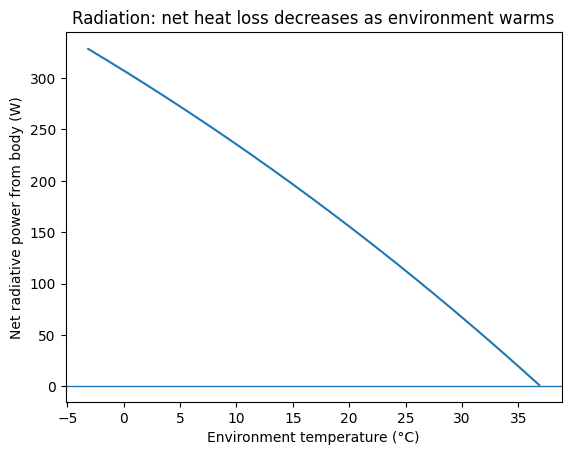

At 20°C, net radiation ≈ 156 W


In [8]:
sigma = 5.670374419e-8  # W/m^2/K^4

def radiative_power(e, A_m2, T_K, Tenv_K):
    return e * sigma * A_m2 * (T_K**4 - Tenv_K**4)

A = 1.5
e = 0.98
T_body = 310.15  # K

Tenv_list = np.linspace(270, 310, 200)
P_net = radiative_power(e, A, T_body, Tenv_list)

plt.figure()
plt.plot(Tenv_list - 273.15, P_net)
plt.xlabel("Environment temperature (°C)")
plt.ylabel("Net radiative power from body (W)")
plt.title("Radiation: net heat loss decreases as environment warms")
plt.axhline(0, linewidth=1)
plt.show()

print(f"At 20°C, net radiation ≈ {radiative_power(e, A, T_body, 293.15):.0f} W")

### 5C) Conduction (simple estimate)

For a flat slab:
$$
\dot{Q} = \frac{kA\Delta T}{L}
$$

Try changing the thickness $L$ to see how insulation works.

In [9]:
def conduction_power(k_W_per_mC, A_m2, deltaT_C, L_m):
    return k_W_per_mC * A_m2 * deltaT_C / L_m

k_tissue = 0.3  # W/m·°C
A = 1.5
deltaT = 10
L = 0.05

Qdot = conduction_power(k_tissue, A, deltaT, L)
print(f"Conduction estimate: {Qdot:.1f} W")
print("Try: set L = 0.01 m (1 cm). Conduction increases a lot.")

Conduction estimate: 90.0 W
Try: set L = 0.01 m (1 cm). Conduction increases a lot.


---

## Part 6) Diffusion: random walk intuition

Diffusion can be understood as many tiny steps in random directions.
Net displacement grows like $ \sqrt{N} $, not $N$.

### 6A) Random walk simulation (2D)

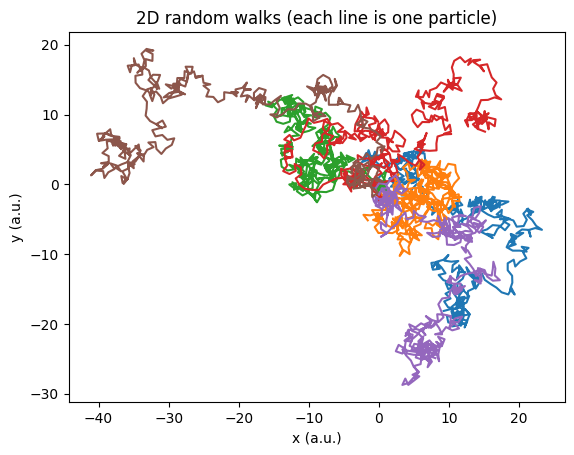

In [10]:
def random_walk_2d(num_steps=500, step_size=1.0):
    angles = np.random.uniform(0, 2*np.pi, size=num_steps)
    dx = step_size * np.cos(angles)
    dy = step_size * np.sin(angles)
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    return x, y

np.random.seed(1)

plt.figure()
for _ in range(6):
    x, y = random_walk_2d(num_steps=400, step_size=1.0)
    plt.plot(x, y)
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.title("2D random walks (each line is one particle)")
plt.axis("equal")
plt.show()

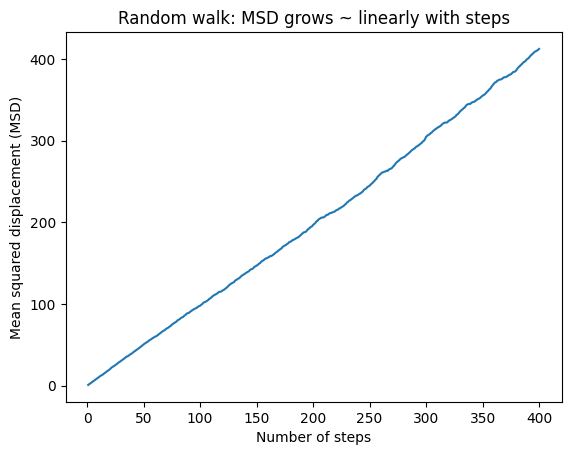

In [11]:
np.random.seed(2)

num_walkers = 2000
num_steps = 400
step_size = 1.0

msd = np.zeros(num_steps)

for _ in range(num_walkers):
    x, y = random_walk_2d(num_steps=num_steps, step_size=step_size)
    r2 = x**2 + y**2
    msd += r2

msd /= num_walkers
steps = np.arange(1, num_steps+1)

plt.figure()
plt.plot(steps, msd)
plt.xlabel("Number of steps")
plt.ylabel("Mean squared displacement (MSD)")
plt.title("Random walk: MSD grows ~ linearly with steps")
plt.show()

### 6B) Diffusion time scaling: $t \propto L^2$

A common scaling:
$$
t \approx \frac{L^2}{2D}
$$

In [12]:
def diffusion_time_seconds(L_m, D_m2_per_s):
    return (L_m**2) / (2*D_m2_per_s)

D_water = 2e-9  # m^2/s (order-of-magnitude)

for L in [15e-6, 1e-3, 1e-2]:
    t_sec = diffusion_time_seconds(L, D_water)
    print(f"L = {L:.2e} m  ->  t ≈ {t_sec:.2e} s  ({t_sec/60:.2e} min)")

L = 1.50e-05 m  ->  t ≈ 5.62e-02 s  (9.37e-04 min)
L = 1.00e-03 m  ->  t ≈ 2.50e+02 s  (4.17e+00 min)
L = 1.00e-02 m  ->  t ≈ 2.50e+04 s  (4.17e+02 min)


---

## Part 7) Fick’s laws: modeling diffusion on a line (1D)

We simulate how a concentration “spike” spreads out over time.

If you see unstable/oscillating results, your time step is too large — we pick safe defaults.

In [13]:
def diffuse_1d(C0, D, dx, dt, steps):
    # Explicit 1D diffusion:
    # C_{t+1}[i] = C_t[i] + D*dt/dx^2 * (C_t[i+1] - 2*C_t[i] + C_t[i-1])
    C = C0.copy()
    alpha = D * dt / dx**2
    if alpha > 0.5:
        print("⚠️ Warning: dt may be too large for stability (alpha > 0.5). Try smaller dt.")
    history = [C.copy()]
    for _ in range(steps):
        C_new = C.copy()
        C_new[1:-1] = C[1:-1] + alpha * (C[2:] - 2*C[1:-1] + C[:-2])
        # zero-flux boundaries (reflecting)
        C_new[0] = C_new[1]
        C_new[-1] = C_new[-2]
        C = C_new
        history.append(C.copy())
    return np.array(history), alpha

N = 200
x = np.linspace(0, 1.0, N)
dx = x[1] - x[0]

C0 = np.zeros(N)
C0[N//2] = 1.0

D = 0.01
dt = 0.2 * dx**2 / D
steps = 300

H, alpha = diffuse_1d(C0, D, dx, dt, steps)
print(f"alpha = {alpha:.3f} (stability requires alpha ≤ 0.5)")

alpha = 0.200 (stability requires alpha ≤ 0.5)


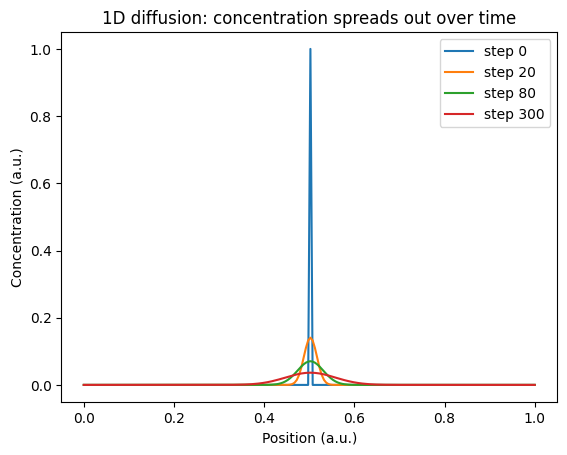

In [14]:
plt.figure()
for s in [0, 20, 80, 300]:
    plt.plot(x, H[s], label=f"step {s}")
plt.xlabel("Position (a.u.)")
plt.ylabel("Concentration (a.u.)")
plt.title("1D diffusion: concentration spreads out over time")
plt.legend()
plt.show()

### 7B) Gas exchange: thin barrier matters

Using a proportionality from Fick’s law:
$$
\text{rate} \propto \frac{A \Delta C}{L}
$$

Let’s see how barrier thickness $L$ changes the diffusion rate.

In [15]:
def relative_diffusion_rate(A, deltaC, L):
    return (A * deltaC) / L

A = 100.0    # m^2 (order-of-magnitude lung surface area)
deltaC = 1.0

L_values = np.array([0.4e-6, 1e-6, 5e-6, 20e-6])
rates = relative_diffusion_rate(A, deltaC, L_values)

for L, r in zip(L_values, rates):
    print(f"L = {L*1e6:>5.1f} µm  ->  relative rate = {r:.2e}")

L =   0.4 µm  ->  relative rate = 2.50e+08
L =   1.0 µm  ->  relative rate = 1.00e+08
L =   5.0 µm  ->  relative rate = 2.00e+07
L =  20.0 µm  ->  relative rate = 5.00e+06


---
## 🫁 Part 8 — Oxygen Diffusion (Fick’s Law)

Oxygen transport in tissue is often **diffusion-limited**.

Fick's First Law describes how substances move from high to low concentration areas (diffusion) and quantifies this movement (diffusion flux) as proportional to the concentration gradient, mathematically expressed:

$$
J = -D \frac{dC}{dx}
$$

Where:
- $J$: flux  
- $D$: diffusion coefficient  
- $C$: concentration  

We now simulate diffusion through tissue numerically.


In [16]:
# Diffusion parameters
D = 2e-9          # m^2/s (oxygen in tissue)
dx = 1e-4         # m
dt = 0.1          # s
nx = 50           # spatial points
nt = 200          # time steps

# Initial concentration
C = np.zeros(nx)
C[0] = 1.0  # oxygen source at boundary

for t in range(nt):
    C_new = C.copy()
    for i in range(1, nx-1):
        C_new[i] = C[i] + D*dt/dx**2 * (C[i+1] - 2*C[i] + C[i-1])
    C = C_new

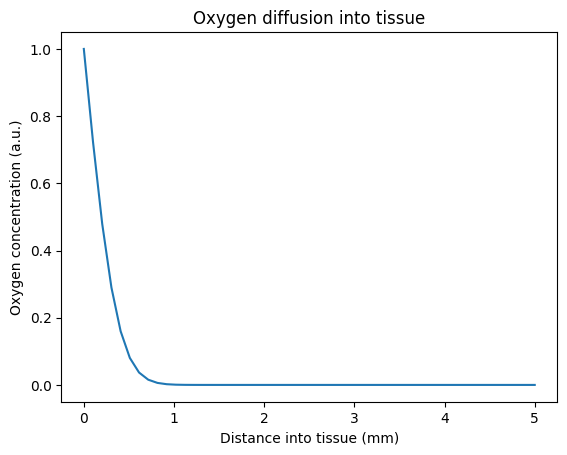

In [17]:
plt.plot(np.linspace(0, nx*dx*1e3, nx), C)
plt.xlabel("Distance into tissue (mm)")
plt.ylabel("Oxygen concentration (a.u.)")
plt.title("Oxygen diffusion into tissue")
plt.show()

This model shows how oxygen concentration decreases with distance from a blood vessel.

---
## ⭐ Optional: Advanced Visualization — Diffusion Heatmap

This shows concentration over **space and time**.


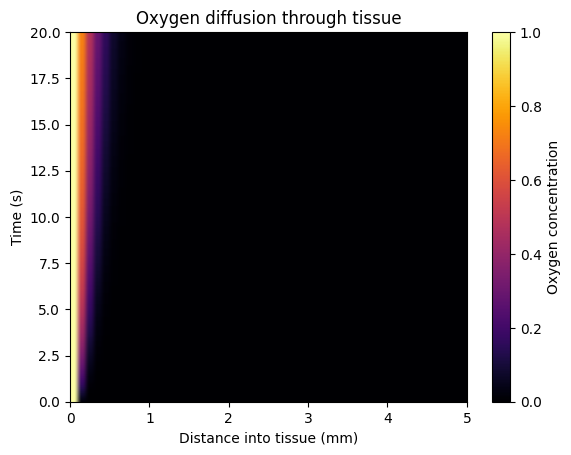

In [18]:
# Space-time heatmap
C = np.zeros(nx)
C[0] = 1.0

C_record = []

for t in range(nt):
    C_new = C.copy()
    for i in range(1, nx-1):
        C_new[i] = C[i] + D*dt/dx**2 * (C[i+1] - 2*C[i] + C[i-1])
    C = C_new
    C_record.append(C.copy())

C_record = np.array(C_record)

plt.imshow(C_record, aspect='auto', origin='lower',
           extent=[0, nx*dx*1e3, 0, nt*dt],
           cmap='inferno')
plt.colorbar(label="Oxygen concentration")
plt.xlabel("Distance into tissue (mm)")
plt.ylabel("Time (s)")
plt.title("Oxygen diffusion through tissue")
plt.show()

---

## Part 9) Diffusion MRI intuition (optional visualization)

Isotropic diffusion spreads equally.  
Anisotropic diffusion spreads more along one axis (like along axons).

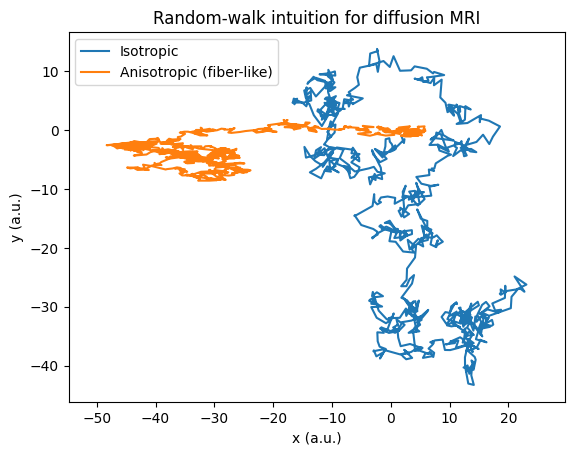

In [19]:
np.random.seed(3)

def anisotropic_walk_2d(num_steps=800, sx=1.0, sy=0.3):
    dx = np.random.normal(0, sx, size=num_steps)
    dy = np.random.normal(0, sy, size=num_steps)
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    return x, y

plt.figure()
x1, y1 = anisotropic_walk_2d(sx=1.0, sy=1.0)
plt.plot(x1, y1, label="Isotropic")

x2, y2 = anisotropic_walk_2d(sx=1.0, sy=0.25)
plt.plot(x2, y2, label="Anisotropic (fiber-like)")

plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.title("Random-walk intuition for diffusion MRI")
plt.axis("equal")
plt.legend()
plt.show()

---

## ✅ Wrap-up checklist

- Can you explain (in words) the difference between **heat** and **temperature**?
- Can you explain why diffusion time scales like $L^2$?
- Can you interpret how anisotropic diffusion relates to fiber structure?
- Can you interpret diffusion profiles in tissue

If yes: you’re ready for Chapter 7 (Thermodynamics).